In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns

In [2]:
houseA = pd.read_csv("../Aras/house_a_combined_dataset.csv")

In [3]:
houseA.drop(columns=["Unnamed: 0"],inplace=True)
houseA

,photocell_wardrobe,photocell_couch,ir_tv_receiver,force_couch_1,force_couch_2,distance_chair_1,distance_chair_2,photocell_fridge,photocell_kitchen_drawer,photocell_wardrobe_2,...,contact_shower_door,sonar_hall,sonar_kitchen,distance_tap,distance_water_closet,temperature_kitchen,force_bed,Resident1,Resident2,Hour
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,12,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2,23
2591996,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2,23
2591997,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2,23
2591998,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,12,2,23


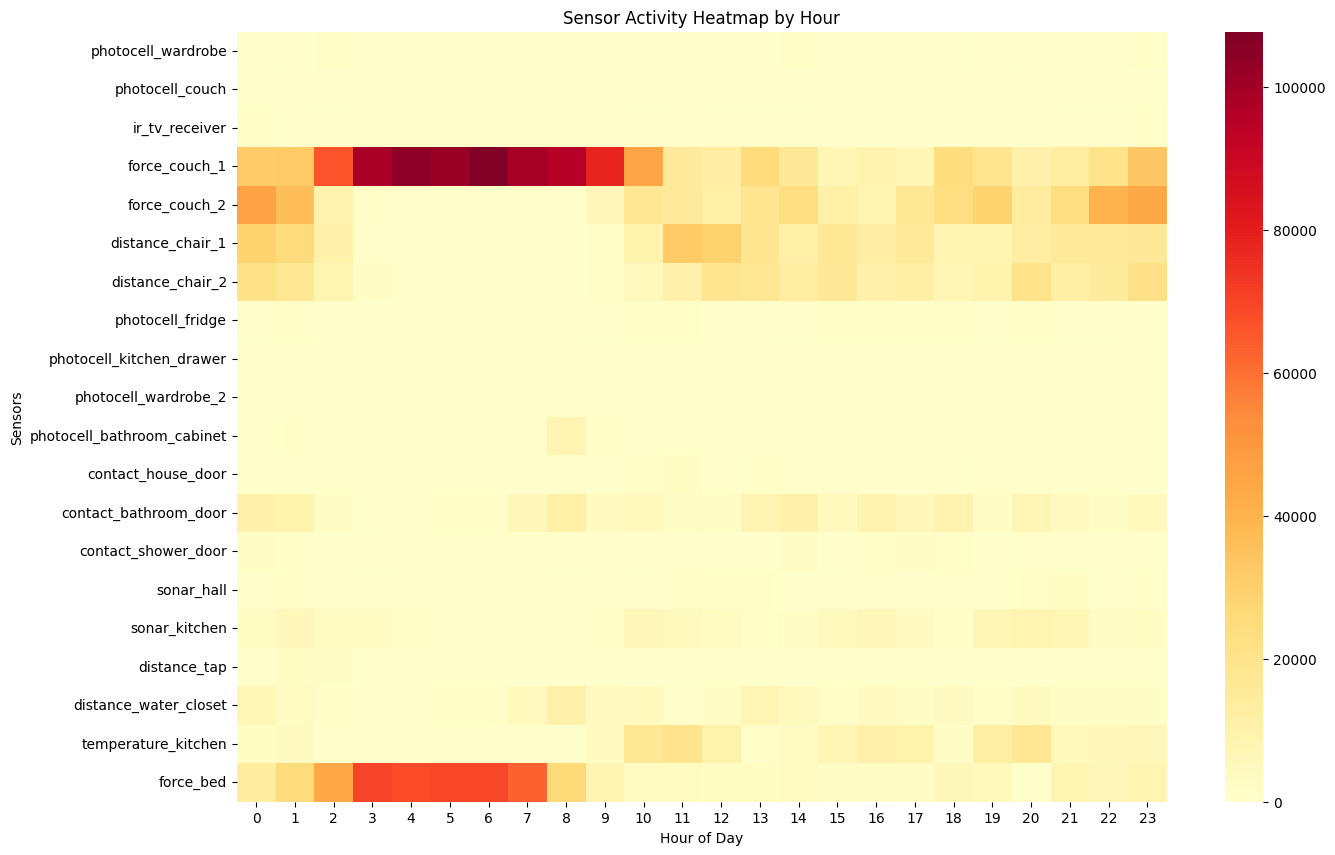

In [4]:
sensor_columns = houseA.columns[:-3]  # Exclude Resident1, Resident2, and Hour
hourly_activity = houseA.groupby('Hour')[sensor_columns].sum()
plt.figure(figsize=(15, 10))
sns.heatmap(hourly_activity.T, cmap='YlOrRd')
plt.title('Sensor Activity Heatmap by Hour')
plt.ylabel('Sensors')
plt.xlabel('Hour of Day')
plt.show()

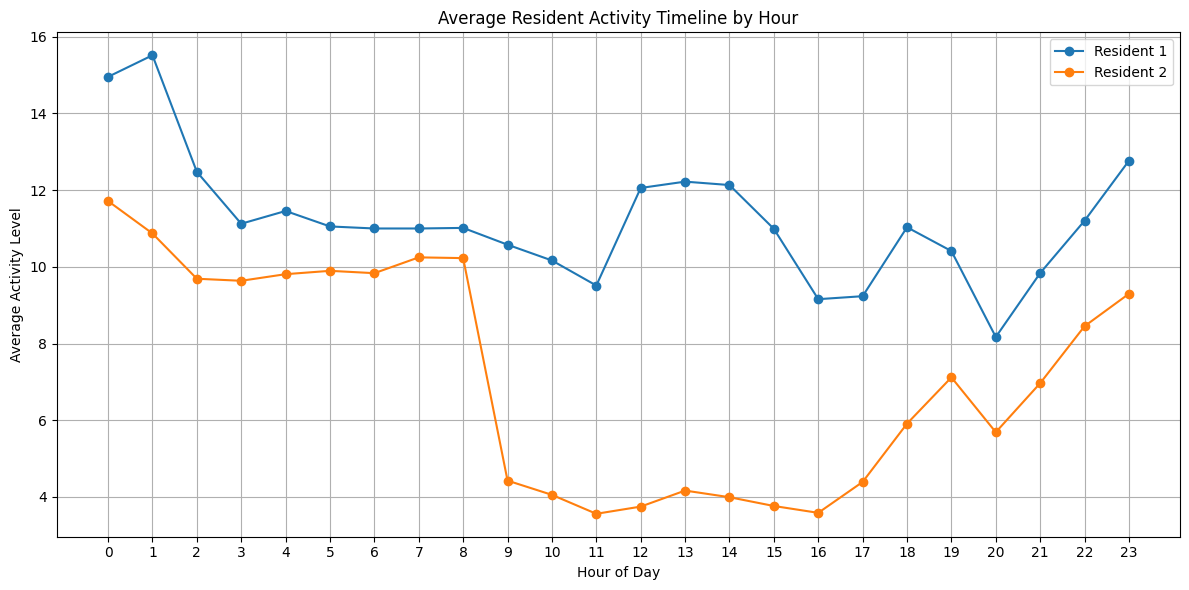

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


resident_activity = houseA.groupby('Hour')[['Resident1', 'Resident2']].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(resident_activity['Hour'], resident_activity['Resident1'], label='Resident 1', marker='o')
plt.plot(resident_activity['Hour'], resident_activity['Resident2'], label='Resident 2', marker='o')
plt.title('Average Resident Activity Timeline by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Activity Level')
plt.xticks(range(0, 24))  
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

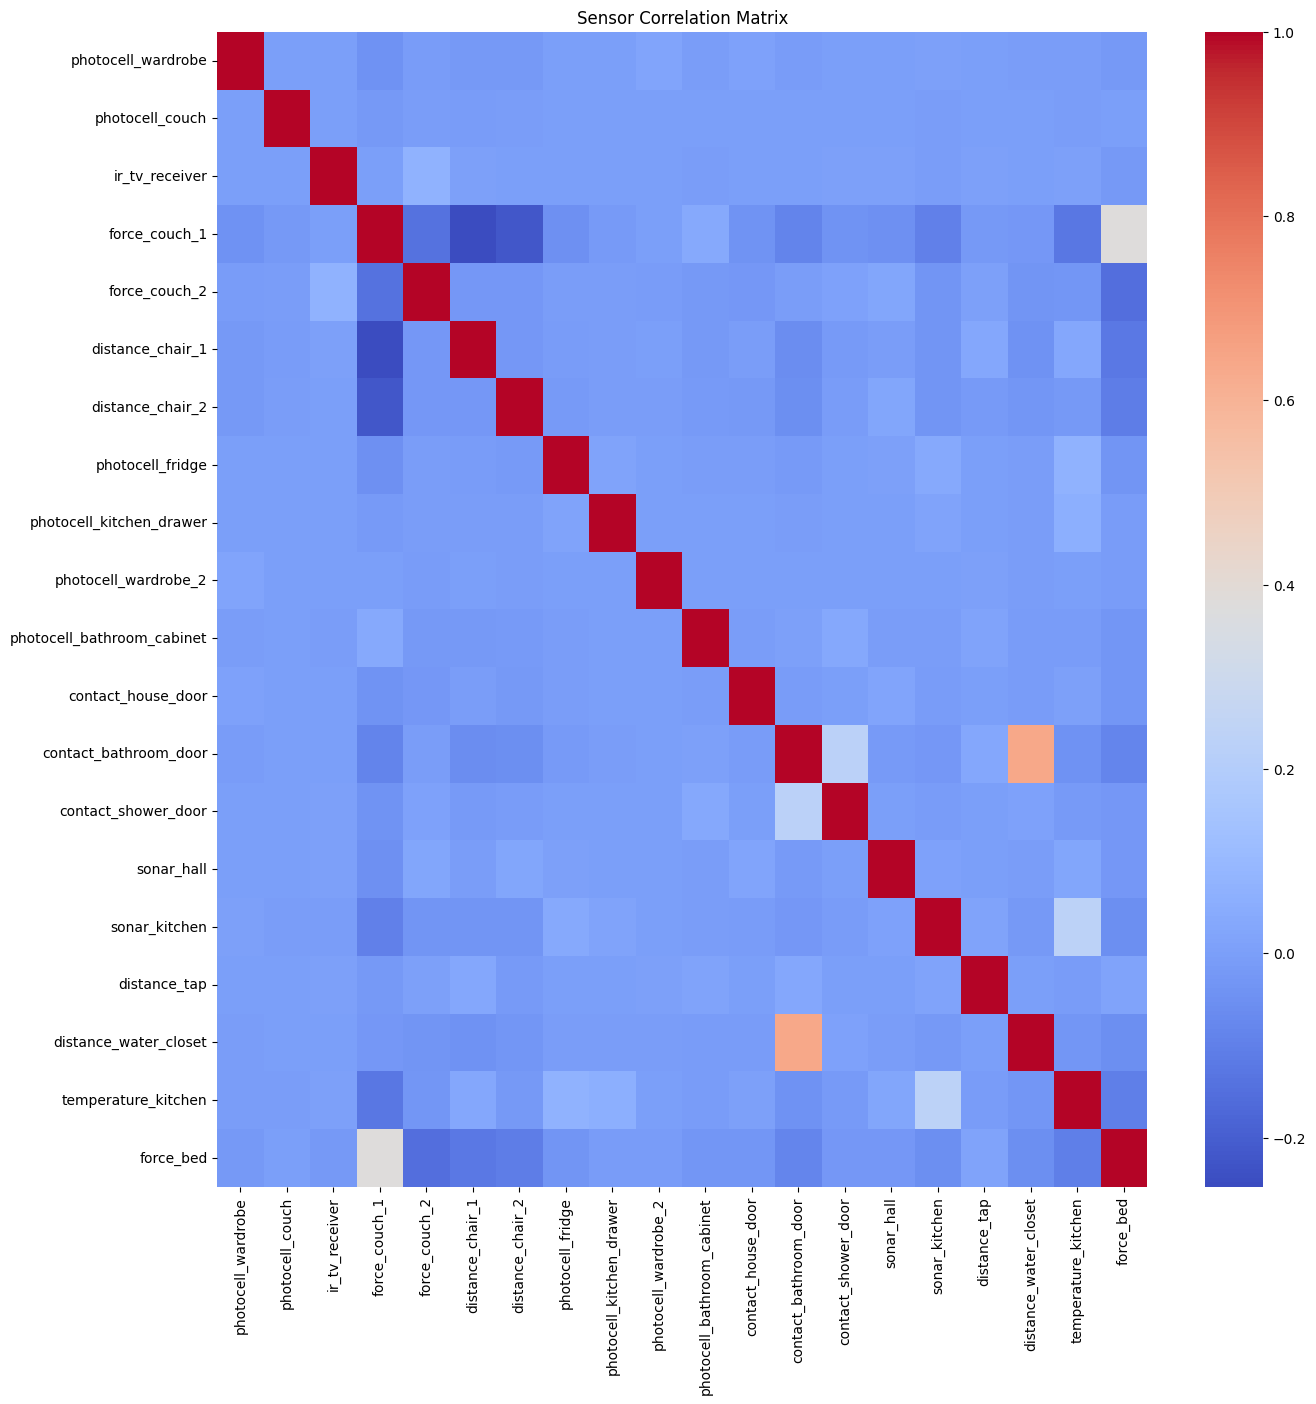

In [6]:
correlation_matrix = houseA[sensor_columns].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Sensor Correlation Matrix')
plt.show()

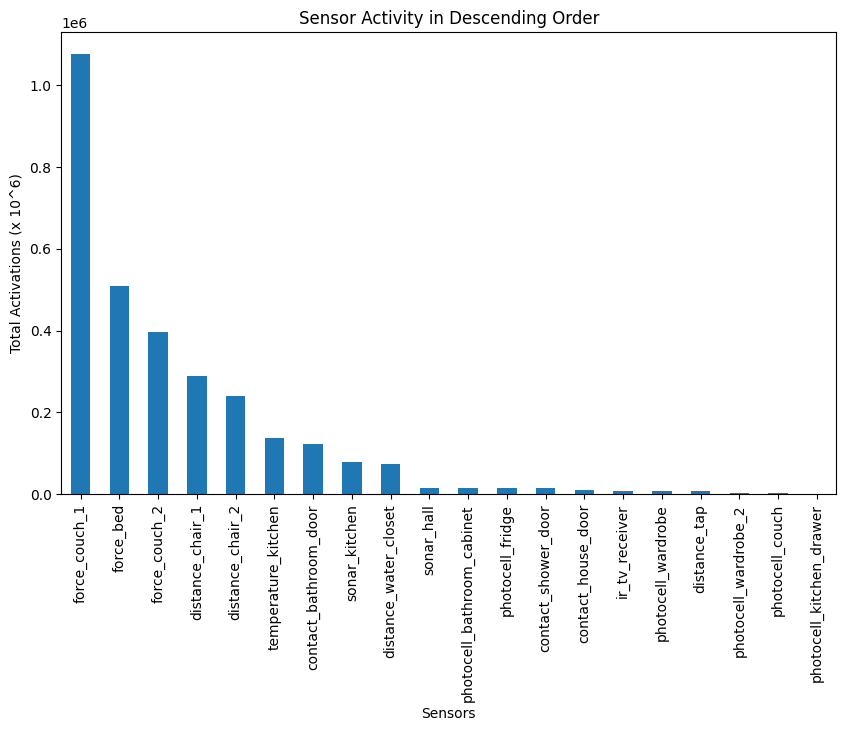

In [7]:
sensor_activity = houseA[sensor_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sensor_activity.plot(kind='bar')
plt.title('Sensor Activity in Descending Order')
plt.xlabel('Sensors')
plt.ylabel('Total Activations (x 10^6)')
plt.xticks(rotation=90)
plt.show()

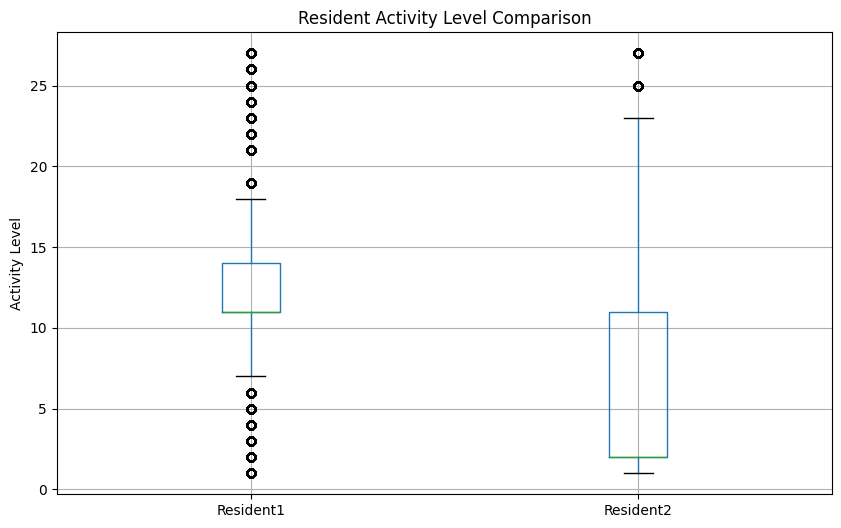

In [8]:
plt.figure(figsize=(10, 6))
houseA[['Resident1', 'Resident2']].boxplot()
plt.title('Resident Activity Level Comparison')
plt.ylabel('Activity Level')
plt.show()

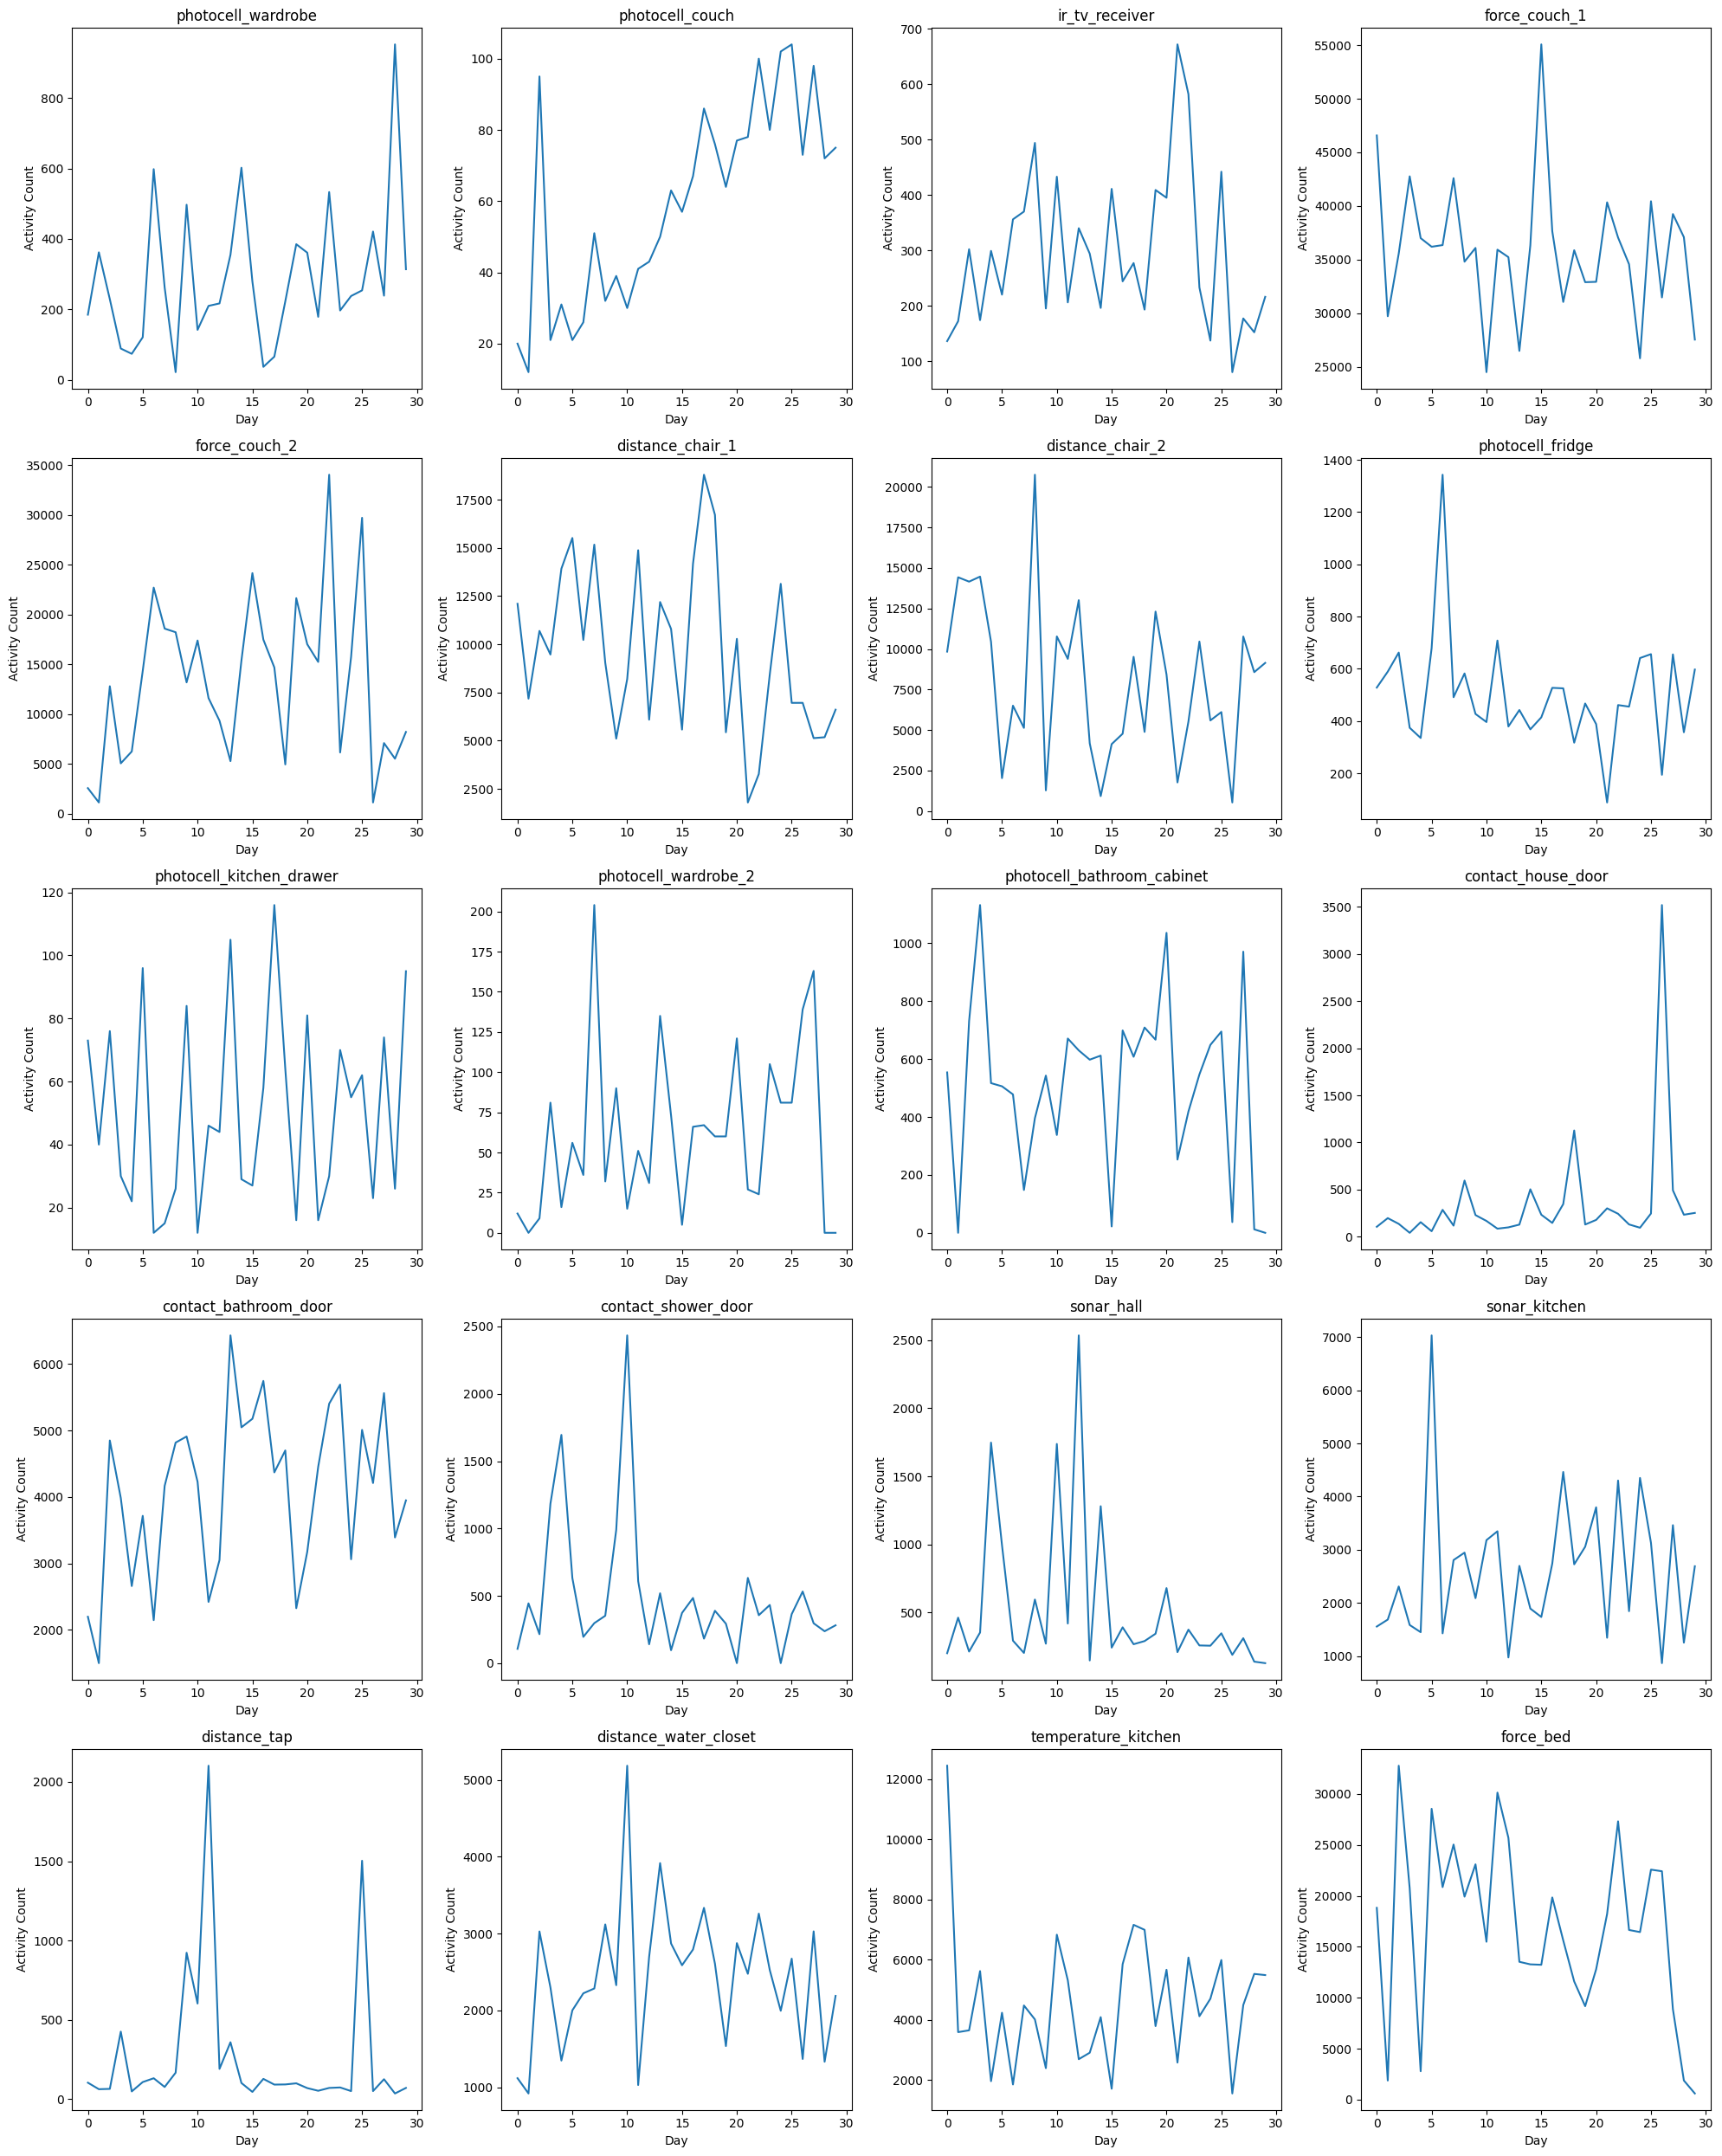

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = houseA.copy()
df['day'] = df.index // 86400

sensor_columns = df.columns[:-4]  
daily_activity = df.groupby('day')[sensor_columns].sum().reset_index()

daily_activity = daily_activity.head(30)

n_sensors = len(sensor_columns)
n_rows = (n_sensors + 3) // 4 
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))

axes = axes.flatten()

for i, sensor in enumerate(sensor_columns):
    ax = axes[i]
    sns.lineplot(data=daily_activity, x='day', y=sensor, ax=ax)
    ax.set_title(sensor)
    ax.set_xlabel('Day')
    ax.set_ylabel('Activity Count')
    ax.set_xticks(range(0, 31, 5))  

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

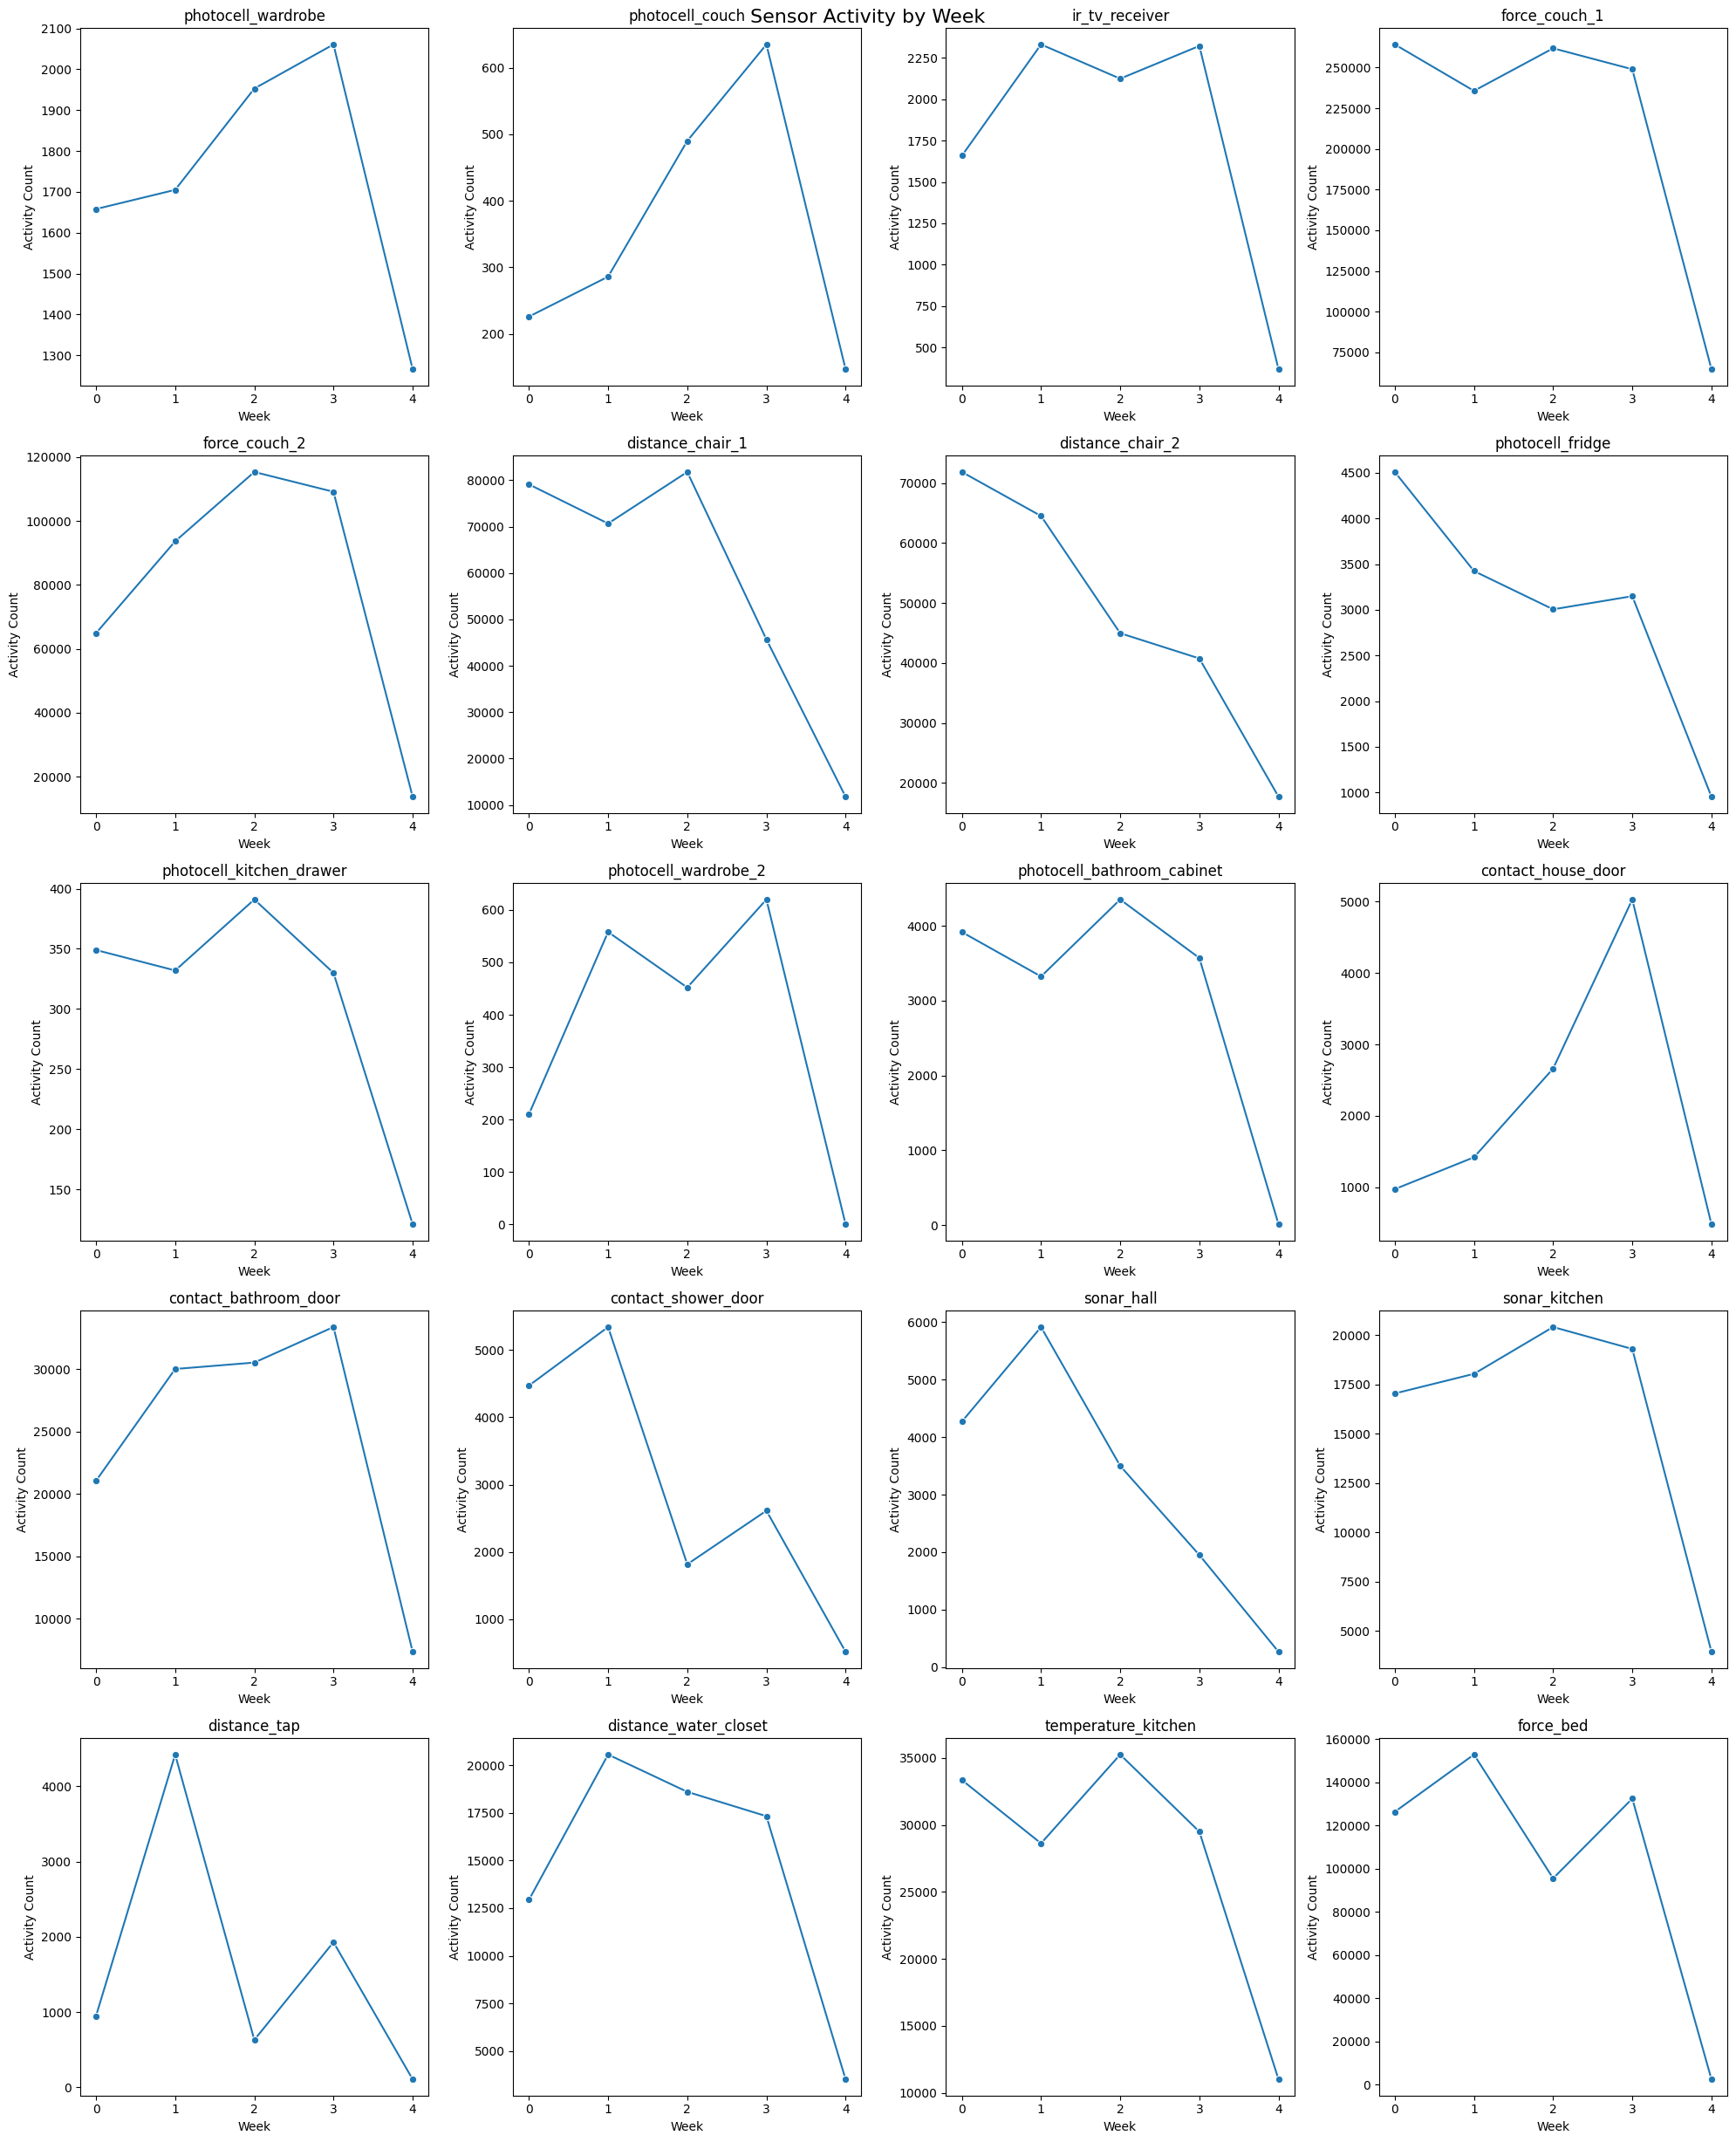

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named houseA
df = houseA.copy()

# Create a week column (7 days = 1 week, each day has 86400 rows)
df['week'] = df.index // (86400 * 7)

# Select only the sensor columns
sensor_columns = df.columns[:-4]  # Exclude Resident1, Resident2, Hour, and week

# Aggregate data by week
weekly_activity = df.groupby('week')[sensor_columns].sum().reset_index()

# Set up the plot
n_sensors = len(sensor_columns)
n_rows = (n_sensors + 3) // 4  # Round up to nearest integer
fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5*n_rows))
fig.suptitle('Sensor Activity by Week', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot each sensor's activity
for i, sensor in enumerate(sensor_columns):
    ax = axes[i]
    sns.lineplot(data=weekly_activity, x='week', y=sensor, ax=ax, marker='o')
    ax.set_title(sensor)
    ax.set_xlabel('Week')
    ax.set_ylabel('Activity Count')
    ax.set_xticks(range(weekly_activity['week'].min(), weekly_activity['week'].max() + 1))

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

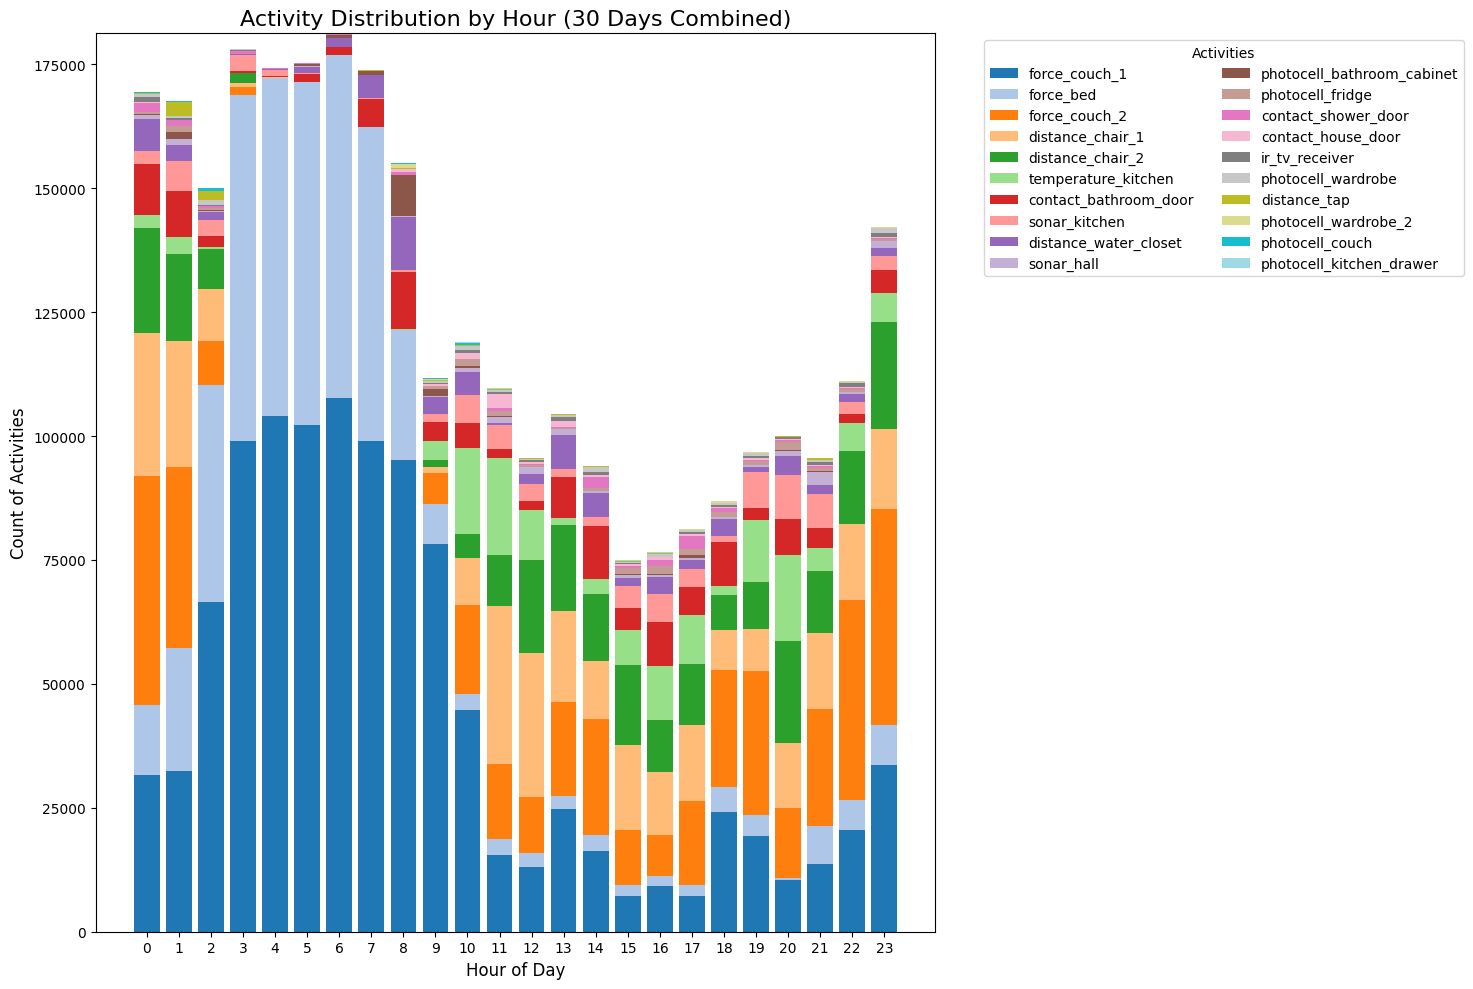

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = houseA.copy()

df['hour'] = df['Hour']

activity_columns = [col for col in df.columns if col not in ['Resident1', 'Resident2', 'Hour', 'hour']]

hourly_activity = df.head(2592000).groupby('hour')[activity_columns].sum().reset_index()

total_activity_counts = hourly_activity[activity_columns].sum().sort_values(ascending=False)

sorted_activity_columns = total_activity_counts.index.tolist()

n_colors = len(sorted_activity_columns)
colors = plt.cm.tab20(np.linspace(0, 1, min(n_colors, 20)))  
if n_colors > 20:
    additional_colors = plt.cm.Set3(np.linspace(0, 1, n_colors - 20))
    colors = np.vstack((colors, additional_colors))

fig, ax = plt.subplots(figsize=(15, 10))

bottom = np.zeros(24)

for i, activity in enumerate(sorted_activity_columns):
    ax.bar(hourly_activity['hour'], hourly_activity[activity], bottom=bottom, label=activity, color=colors[i])
    bottom += hourly_activity[activity]

ax.set_title('Activity Distribution by Hour (30 Days Combined)', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=12)
ax.set_ylabel('Count of Activities', fontsize=12)
ax.set_xticks(range(24))
ax.set_xticklabels(range(24))

plt.legend(title='Activities', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()

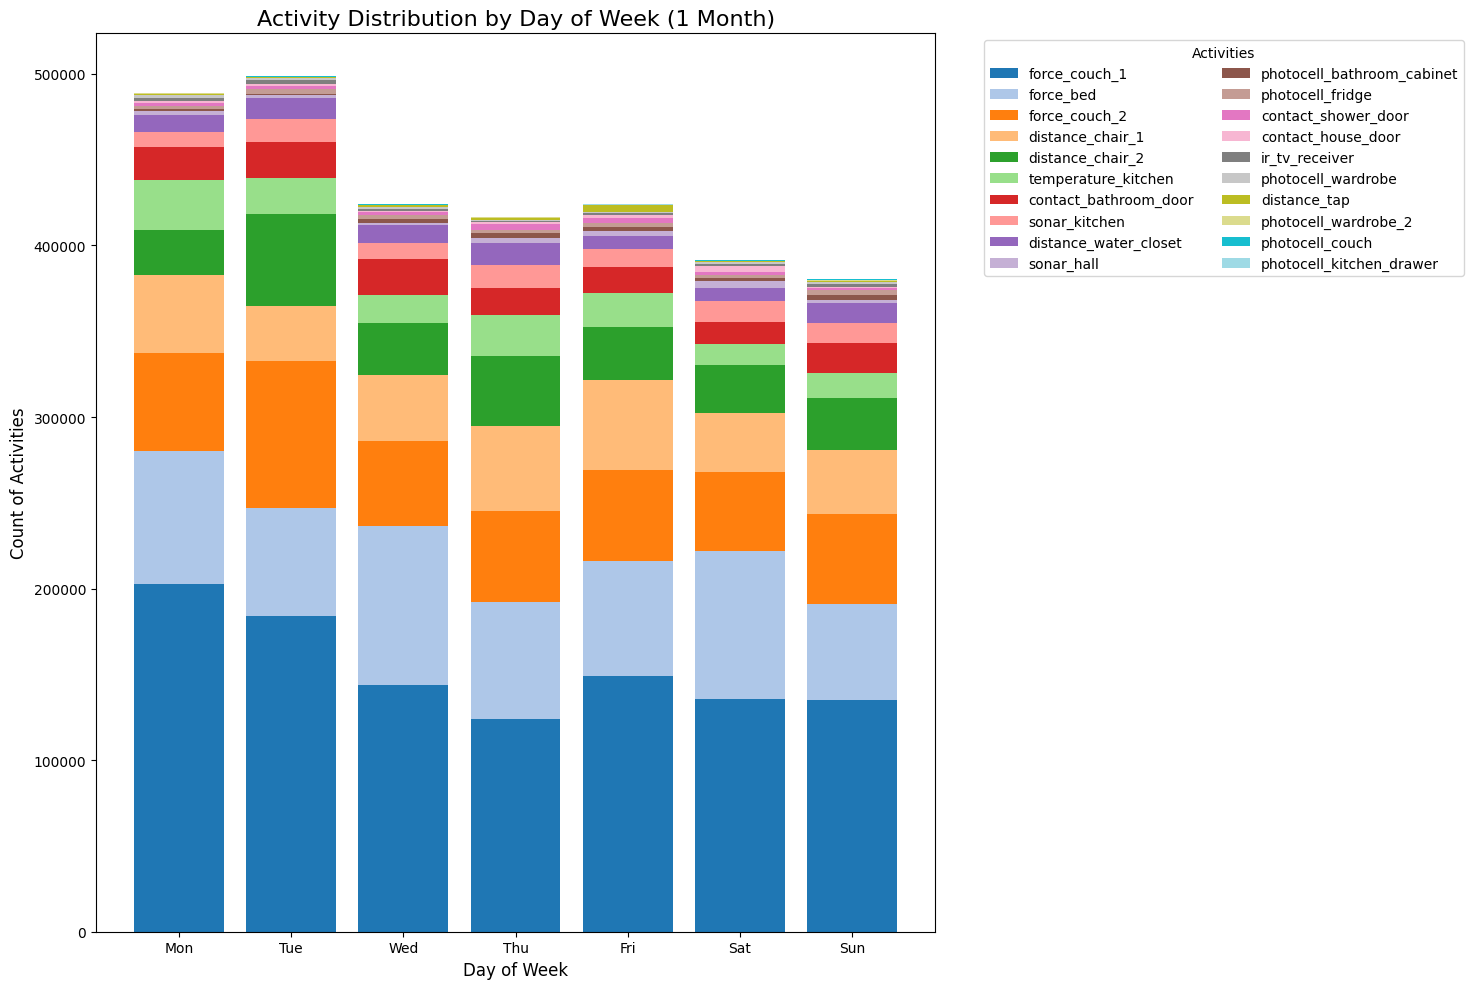

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = houseA.copy()

activity_columns = [
    "photocell_wardrobe",         # Column 1: Ph1 - Photocell in Wardrobe
    "photocell_couch",            # Column 2: Ph2 - Photocell in Convertible Couch (Resident 2's bed)
    "ir_tv_receiver",             # Column 3: Ir1 - IR Sensor at TV receiver
    "force_couch_1",              # Column 4: Fo1 - Force Sensor on Couch (1)
    "force_couch_2",              # Column 5: Fo2 - Force Sensor on Couch (2)
    "distance_chair_1",           # Column 6: Di3 - Distance Sensor at Chair (1)
    "distance_chair_2",           # Column 7: Di4 - Distance Sensor at Chair (2)
    "photocell_fridge",           # Column 8: Ph3 - Photocell at Fridge
    "photocell_kitchen_drawer",   # Column 9: Ph4 - Photocell at Kitchen Drawer
    "photocell_wardrobe_2",       # Column 10: Ph5 - Photocell in Wardrobe (another one)
    "photocell_bathroom_cabinet", # Column 11: Ph6 - Photocell at Bathroom Cabinet
    "contact_house_door",         # Column 12: Co1 - Contact Sensor at House Door
    "contact_bathroom_door",      # Column 13: Co2 - Contact Sensor at Bathroom Door
    "contact_shower_door",        # Column 14: Co3 - Contact Sensor at Shower Cabinet Door
    "sonar_hall",                 # Column 15: So1 - Sonar Distance Sensor in Hall
    "sonar_kitchen",              # Column 16: So2 - Sonar Distance Sensor in Kitchen
    "distance_tap",               # Column 17: Di1 - Distance Sensor at Tap
    "distance_water_closet",      # Column 18: Di2 - Distance Sensor at Water Closet
    "temperature_kitchen",        # Column 19: Te1 - Temperature Sensor in Kitchen
    "force_bed"                   # Column 20: Fo3 - Force Sensor on Bed
]

df['day'] = (df.index // (24 * 60 * 60)) % 7

weekly_activity = df.groupby('day')[activity_columns].sum()

activity_order = weekly_activity.sum().sort_values(ascending=False).index

fig, ax = plt.subplots(figsize=(15, 10))

bottom = np.zeros(7)  

colors = plt.cm.tab20(np.linspace(0, 1, len(activity_columns)))

for i, activity in enumerate(activity_order):
    ax.bar(weekly_activity.index, weekly_activity[activity], bottom=bottom, label=activity, color=colors[i])
    bottom += weekly_activity[activity]

ax.set_title('Activity Distribution by Day of Week (1 Month)', fontsize=16)
ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Count of Activities', fontsize=12)
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.legend(title='Activities', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)

plt.tight_layout()
plt.show()